In [1]:
import os
import pandas as pd
import geopandas as gpd
import pdb
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from shapely.ops import cascaded_union
import shapely.wkt
from fiona.crs import from_epsg
import fiona
from geopandas.tools import sjoin

plt.rcParams["figure.figsize"] = [16, 9] #optional

# Neighborhoods

In [29]:
king_county = os.path.join(os.getcwd(), 'datafiles/neighborhood_SHP/neighborhood/neighborhood.shp')
king_county_data = gpd.read_file(king_county)
king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})
# king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})
# print(king_county)

# kc_data = king_county_data.loc[:, ('GEO_ID_GRP','geometry')]
# len(king_county_data.loc[:, 'NEIGHBORHO'].unique())
# king_county_data

OSError: no such file or directory: 'C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\scripts\\preproc\\datafiles/neighborhood_SHP/neighborhood/neighborhood.shp'

In [ ]:
blockgroup_fp = os.path.join(os.getcwd(), 'Seattle-Mobility-Index\\seamo\\data\\processed\\SeattleCensusBlockGroups.csv')
blkgrp = gpd.pd.read_csv(blockgroup_fp)
# blkgrps = blkgrp.loc[:, 'coordinates']
# blkgrp
# print(type(blkgrp))
blkgrps = blkgrp['coordinates'].apply(shapely.wkt.loads)
print(blkgrps)


polygons = blkgrps
boundary = gpd.GeoSeries(cascaded_union(polygons))
# boundary.plot(color = 'red')
# plt.show()
# polygons[0]
boundary.crs = from_epsg(4326)

In [ ]:
crs = {'init': 'epsg:4326'}
county = gpd.GeoDataFrame(king_county_data.loc[:, ('NEIGHBORHO','geometry')], crs=crs, geometry='geometry')
# multi = boundary[0]
outline = gpd.GeoDataFrame(boundary, crs=crs)
county
outline.columns=['geometry']
# type(county)

In [ ]:
rectangle = gpd.GeoDataFrame([Polygon([(-122.435896, 47.734000),
                                             (-122.285766, 47.734000),
                                             (-122.285766, 47.735004),
                                             (-122.246627, 47.683255),
                                             (-122.245314, 47.495860),
                                             (-122.435896, 47.495860)])],
                            columns=['geometry'],
                         geometry='geometry')
rectangle.crs = from_epsg(4326)
rectangle.crs = gdf.crs

In [ ]:
seattle = gpd.overlay(outline, rectangle, how='intersection')
seattle.crs = from_epsg(4326)
seattle.crs = county.crs
print(seattle)
seattle.plot()

In [ ]:
data = sjoin(county, seattle, op='intersects')
# op='intersects'
data.plot(cmap="tab20b")
len(data['NEIGHBORHO'].unique())
data

# Council Districts

In [ ]:
king_county = os.path.join(os.getcwd(), 'Seattle-Mobility-Index/seamo/data/raw/shapefiles/sccdst.shp')
king_county_data = gpd.read_file(king_county)
king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})

In [ ]:
crs = {'init': 'epsg:4326'}
county = gpd.GeoDataFrame(king_county_data.loc[:, ('NAME','geometry')], crs=crs, geometry='geometry')

data = sjoin(county, seattle, op='intersects')
# op='intersects'
data.plot(cmap="tab20b")
data

# Zipcode

In [ ]:
king_county = os.path.join(os.getcwd(), 'Seattle-Mobility-Index/seamo/data/raw/shapefiles/zipcode.shp')
king_county_data = gpd.read_file(king_county)
king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})
# king_county_data

In [ ]:
crs = {'init': 'epsg:4326'}
county = gpd.GeoDataFrame(king_county_data.loc[:, ('ZIPCODE','geometry')], crs=crs, geometry='geometry')

data = sjoin(county, seattle, op='intersects')
# op='intersects'
data.plot(cmap="tab20b")
data

# Urban Village

In [ ]:
king_county = os.path.join(os.getcwd(), 'Seattle-Mobility-Index/seamo/data/raw/shapefiles/DPD_uvmfg_polygon.shp')
king_county_data = gpd.read_file(king_county)
king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})
# king_county_data

In [ ]:
crs = {'init': 'epsg:4326'}
county = gpd.GeoDataFrame(king_county_data.loc[:, ('UV_NAME','geometry')], crs=crs, geometry='geometry')

data = sjoin(county, seattle, op='intersects')
# op='intersects'
data.plot(cmap="tab20b")
data

# Block Groups

In [4]:
king_county = os.path.join(os.getcwd(), 'Seattle-Mobility-Index/seamo/data/raw/shapefiles/blkgrp10_shore.shp')
seattle = os.path.join(os.getcwd(), 
                       'Seattle-Mobility-Index/seamo/data/raw/SeattleCensusBlocksandNeighborhoodCorrelationFile.xlsx')
king_county_data = gpd.read_file(king_county)
king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})
seattle_data = pd.read_excel(seattle)

kc_data = king_county_data.loc[:, ('GEO_ID_GRP','geometry')]
s_data = seattle_data.loc[:, 'GEOID10'].astype(str).str[6:12].unique()

OSError: no such file or directory: 'C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\scripts\\preproc\\Seattle-Mobility-Index/seamo/data/raw/shapefiles/blkgrp10_shore.shp'

In [ ]:
s = pd.DataFrame(s_data.astype(str))
s.columns = ['tract_blkgrp']
# (name='tract_blkgrp').astype(np.int64)
# print(type(s_data))
tract_blkgrp = kc_data.loc[:, 'GEO_ID_GRP'].str[6:].astype(str)
geometry = kc_data.loc[:, 'geometry']

In [ ]:
tract_blkgrp.to_frame(name='tract_blkgrp')
geometry.to_frame(name='geometry')
kc = pd.concat([tract_blkgrp, geometry],axis=1)
kc.columns=['tract_blkgrp', 'geometry']

In [ ]:
kc_s_join = pd.merge(s, kc, left_on='tract_blkgrp', right_on='tract_blkgrp', how='inner')
# len(kc_s_join)

In [ ]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(kc_s_join, crs=crs, geometry='geometry')
gdf = gpd.overlay(gdf, rectangle, how='intersection')
# gdf = gdf.to_crs({'init': 'epsg:4326'})
gdf.plot(cmap="tab20b")
# data.loc[:, 'tract_blkgrp']
data = pd.concat([gdf, gdf.geometry.centroid], axis=1)
data.columns=['tract_blkgrp', 'geometry', 'centroid']

In [ ]:
fp = king_county = os.path.join(os.getcwd(), '../seamo/data/processed/SeattleCensusBlockGroups.csv')
# data.to_csv(fp)

In [ ]:
# desired_geometry = "aaa"
desired_geometry = str(bbb) + '.shp'
print(os.path.join('seamo/data/raw/shapefiles/', str(desired_geometry)))

            geoid          area  \
0    530330069001  2.330454e+06   
1    530330116003  5.959703e+06   
2    530330116005  3.510129e+06   
3    530330120003  5.087951e+06   
4    530330115002  5.727877e+06   
5    530330120002  5.475699e+06   
6    530330121002  9.182014e+06   
7    530330120001  5.017069e+06   
8    530330011001  5.436025e+06   
9    530330041006  4.736091e+06   
10   530330066002  2.614660e+06   
11   530330067001  3.637521e+06   
12   530330015002  6.805870e+06   
13   530330032006  6.005342e+06   
14   530330097024  4.081260e+06   
15   530330032004  2.797209e+06   
16   530330016002  7.120134e+06   
17   530330015001  5.622151e+06   
18   530330056003  1.001482e+07   
19   530330056004  4.852956e+06   
20   530330056001  5.116340e+06   
21   530330058014  1.136739e+07   
22   530330057006  3.732918e+06   
23   530330056005  5.373738e+06   
24   530330116006  9.536131e+06   
25   530330058021  3.953194e+06   
26   530330103001  3.346872e+06   
27   530330103002  3

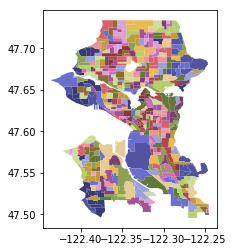

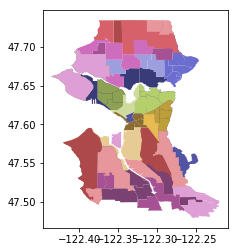

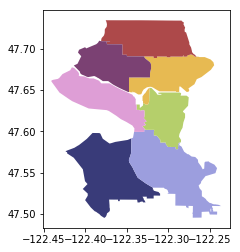

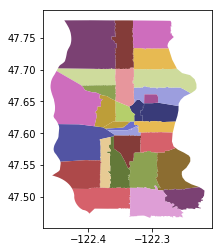

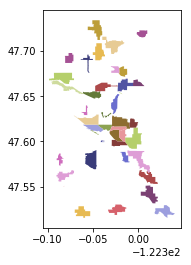

In [66]:
def read_file_into_dataframe(desired_geometry, name, crs):
    # shapefile filepath
    desired_geometry = str(desired_geometry) + '.shp'
    FP = os.path.join(os.pardir, os.pardir,
        'seamo/data/raw/shapefiles/', desired_geometry)

    # read filepath into dataframe
    df = gpd.read_file(FP)

    # convert stateplane to lat/long
    df = df.to_crs({'init': 'epsg:4326'})

    # select desired columns and convert into geodataframe
    if desired_geometry == 'blkgrp10_shore' + '.shp':
        gdf = gpd.GeoDataFrame(df.loc[:, (name, 'Shape_area', 'geometry')],
            crs=crs, geometry='geometry')

        # process columns from geodataframe
        tract_blkgrp = gdf.loc[:, 'GEO_ID_GRP'].str[6:].astype(str)
        geometry = gdf.loc[:, 'geometry']
        area = gdf.loc[:, 'Shape_area']
        
        # convert series back to dataframe
        tract_blkgrp.to_frame(name='tract_blkgrp')
        geometry.to_frame(name='geometry')
        area.to_frame(name='area')
        gdf = pd.concat([tract_blkgrp, geometry, area],axis=1)
        gdf.columns = ['tract_blkgrp', 'geometry', 'area']
    else:
        gdf = gpd.GeoDataFrame(df.loc[:, (name, 'geometry')],
            crs=crs, geometry='geometry')
        gdf.columns = ['key', 'geometry']
    return gdf


def process_data(desired_geometry, name, crs, outline, rectangle):
    gdf = read_file_into_dataframe(desired_geometry, name, crs)
    seattle = spatial_overlays(outline, rectangle, how='intersection')
    seattle = seattle.drop(['idx1', 'idx2'], axis=1)
    seattle.crs = from_epsg(4326)
    seattle.crs = gdf.crs

    # spatial join between king county and seattle
    data = sjoin(gdf, seattle, op='intersects')
    data = data.drop(['index_right'], axis=1)
    mask = data.key.duplicated(keep='first')
    data = data[~mask]

    # plot map
    data.plot(cmap="tab20b")
    return data


def seattle_outline(df, crs):
    blkgrps = df.geometry
    polygons = blkgrps
    boundary = gpd.GeoSeries(cascaded_union(polygons))
    # boundary.plot(color = 'red')
    # plt.show()
    boundary.crs = from_epsg(4326)
    outline = gpd.GeoDataFrame(boundary, crs=crs)
    outline.columns = ['geometry']
    return outline


def write_to_csv(desired_output, data):
    desired_output = str(desired_output) + '.csv'
    PRCOESSED_FP = os.path.join(os.pardir, os.pardir,
        'seamo/data/processed/csv_files/', desired_output)
    data.to_csv(PRCOESSED_FP)


def main():
    # create boundary for seattle
    crs = {'init': 'epsg:4326'}
    rectangle = gpd.GeoDataFrame([Polygon([(-122.435896, 47.734000),
        (-122.285766, 47.734000),
        (-122.285766, 47.735004),
        (-122.246627, 47.683255),
        (-122.245314, 47.495860),
        (-122.435896, 47.495860)])],
        columns=['geometry'], geometry='geometry')
    rectangle.crs = from_epsg(4326)

    # Block Group
    # shape file and correlation csv filepaths
    SEATTLE_FP = 'seamo/data/raw/SeattleCensusBlocksandNeighborhoodCorrelationFile.xlsx'
    SEATTLE_FP = os.path.join(os.pardir, os.pardir, SEATTLE_FP)

    # read filepath into dataframe
    seattle_data = pd.read_excel(SEATTLE_FP)

    # select desired columns
    s_data = seattle_data.loc[:, 'GEOID10'].astype(str).str[6:12].unique()

    # process Seattle correlation dataframe
    s = pd.DataFrame(s_data.astype(str))
    s.columns = ['tract_blkgrp']

    # process King County correlation dataframe
    gdf = read_file_into_dataframe('blkgrp10_shore', 'GEO_ID_GRP', crs)

    # inner join on Seattle census tract/block groups
    gdf = pd.merge(s, gdf, left_on='tract_blkgrp',
        right_on='tract_blkgrp', how='inner')

    # convert pandas dataframe to geopandas dataframe
    gdf = gpd.GeoDataFrame(gdf, crs=crs, geometry='geometry')
    gdf.crs = from_epsg(4326)

    # overlay boundary of seattle with current outline to remove noise
    data = spatial_overlays(gdf, rectangle, how='intersection')
    data = data.drop(['idx1', 'idx2'], axis=1)

    # plot map
    data.plot(cmap="tab20b")

    # calculate centroids
    centroids = data.geometry.centroid
    data['tract_blkgrp'] = '530330' + data['tract_blkgrp'].astype(str)
    blkgrps = pd.concat([data, centroids.y, centroids.x], axis=1)
    blkgrps.columns = ['geoid', 'area', 'geometry', 'lat', 'long']

    # outline of seattle used for overlay intersection
    outline = seattle_outline(blkgrps, crs)

    # Neighborhood
    neighborhoods = process_data('neighborhood', 'NEIGHBORHO',
        crs, outline, rectangle)

    # Council District
    coucil_districts = process_data('sccdst', 'NAME',
        crs, outline, rectangle)
    print(blkgrps)

    # Zipcode
    zipcodes = process_data('zipcode', 'ZIPCODE',
        crs, outline, rectangle)

    # Urban Village
    urban_villages = process_data('DPD_uvmfg_polygon', 'UV_NAME',
        crs, outline, rectangle)
    #write to csv file
#     write_to_csv('SeattleNeighborhoods', neighborhoods)
#     write_to_csv('SeattleCouncilDistricts', coucil_districts)
#     write_to_csv('SeattleZipcodes', zipcodes)
#     write_to_csv('SeattleUrbanVillages', urban_villages)
#     write_to_csv('SeattleCensusBlockGroups', blkgrps)
main()

In [56]:
def spatial_overlays(df1, df2, how='intersection'):
    '''Compute overlay intersection of two 
        GeoPandasDataFrames df1 and df2
    '''
    df1 = df1.copy()
    df2 = df2.copy()
    df1['geometry'] = df1.geometry.buffer(0)
    df2['geometry'] = df2.geometry.buffer(0)
    if how=='intersection':
        # Spatial Index to create intersections
        spatial_index = df2.sindex
        df1['bbox'] = df1.geometry.apply(lambda x: x.bounds)
        df1['histreg']=df1.bbox.apply(lambda x:list(spatial_index.intersection(x)))
        pairs = df1['histreg'].to_dict()
        nei = []
        for i,j in pairs.items():
            for k in j:
                nei.append([i,k])
        
        pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
        pairs = pairs.merge(df1, left_on='idx1', right_index=True)
        pairs = pairs.merge(df2, left_on='idx2', right_index=True, suffixes=['_1','_2'])
        pairs['Intersection'] = pairs.apply(lambda x: (x['geometry_1'].intersection(x['geometry_2'])).buffer(0), axis=1)
        pairs = gpd.GeoDataFrame(pairs, columns=pairs.columns, crs=df1.crs)
        cols = pairs.columns.tolist()
        cols.remove('geometry_1')
        cols.remove('geometry_2')
        cols.remove('histreg')
        cols.remove('bbox')
        cols.remove('Intersection')
        dfinter = pairs[cols+['Intersection']].copy()
        dfinter.rename(columns={'Intersection':'geometry'}, inplace=True)
        dfinter = gpd.GeoDataFrame(dfinter, columns=dfinter.columns, crs=pairs.crs)
        dfinter = dfinter.loc[dfinter.geometry.is_empty==False]
        return dfinter
    elif how=='difference':
        spatial_index = df2.sindex
        df1['bbox'] = df1.geometry.apply(lambda x: x.bounds)
        df1['histreg']=df1.bbox.apply(lambda x:list(spatial_index.intersection(x)))
        df1['new_g'] = df1.apply(lambda x: reduce(lambda x, y: x.difference(y).buffer(0), [x.geometry]+list(df2.iloc[x.histreg].geometry)) , axis=1)
        df1.geometry = df1.new_g
        df1 = df1.loc[df1.geometry.is_empty==False].copy()
        df1.drop(['bbox', 'histreg', new_g], axis=1, inplace=True)
        return df1